In [41]:
from bankingSystemLearning import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 20)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [48]:
cMatrix = np.ones((100,100))*0.8
np.fill_diagonal(cMatrix, 1)
con = np.load("concentrationParams.npy")

In [49]:
theta = np.array([[1.77051349],[1.04388253]])
theta = np.array(theta).reshape(-1,1) 
# simulation and data collection
simulationSteps = 500
cMatrix = np.ones((100,100))*0.8
np.fill_diagonal(cMatrix, 1)
model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                leverageRatio = 20.0,                                     # leverage ratio upper bound for all banks
                depositReserve = 0.2,                                     # capital reserve as a ratio of portfolio value
                num_borrowing= 20,                                        # number of borrowing request per bank per step
                sizeOfBorrowing = 1.0, concentrationParameter = con,                                      # size of borrowing as a ratio of equity capital
                num_banks=100,                                            # number of banks in the system 
                alpha = 0.5,                                              # portfolio recovery rate                           
                beta = 0.9,                                               # interbank loan recovery rate
                fedRate = 0.04,                                            # interest rate on borrowing   
                portfolioReturnRate = 0.10,          
                # return rate on portfolio
                returnVolatiliy = 0.18,
                returnCorrelation = cMatrix,
                liquidityShockNum = 10,                                    # number of liquidity shocks per step      
                shockSize = 0.02,                                          # size of the shock
                shockDuration = [300, 302]) # duration of the shock
    
agent_data = model.datacollector.get_agent_vars_dataframe()
model_data = model.datacollector.get_model_vars_dataframe()

100%|██████████| 500/500 [00:05<00:00, 90.24it/s] 


In [51]:
modele = pd.read_csv("balanceSheetAnalysis/banksData_2022.csv")[:100]["assets"].values.reshape(-1,1)
def R_tau(model):
    value = (model.e - modele)/modele
    return value.sum()


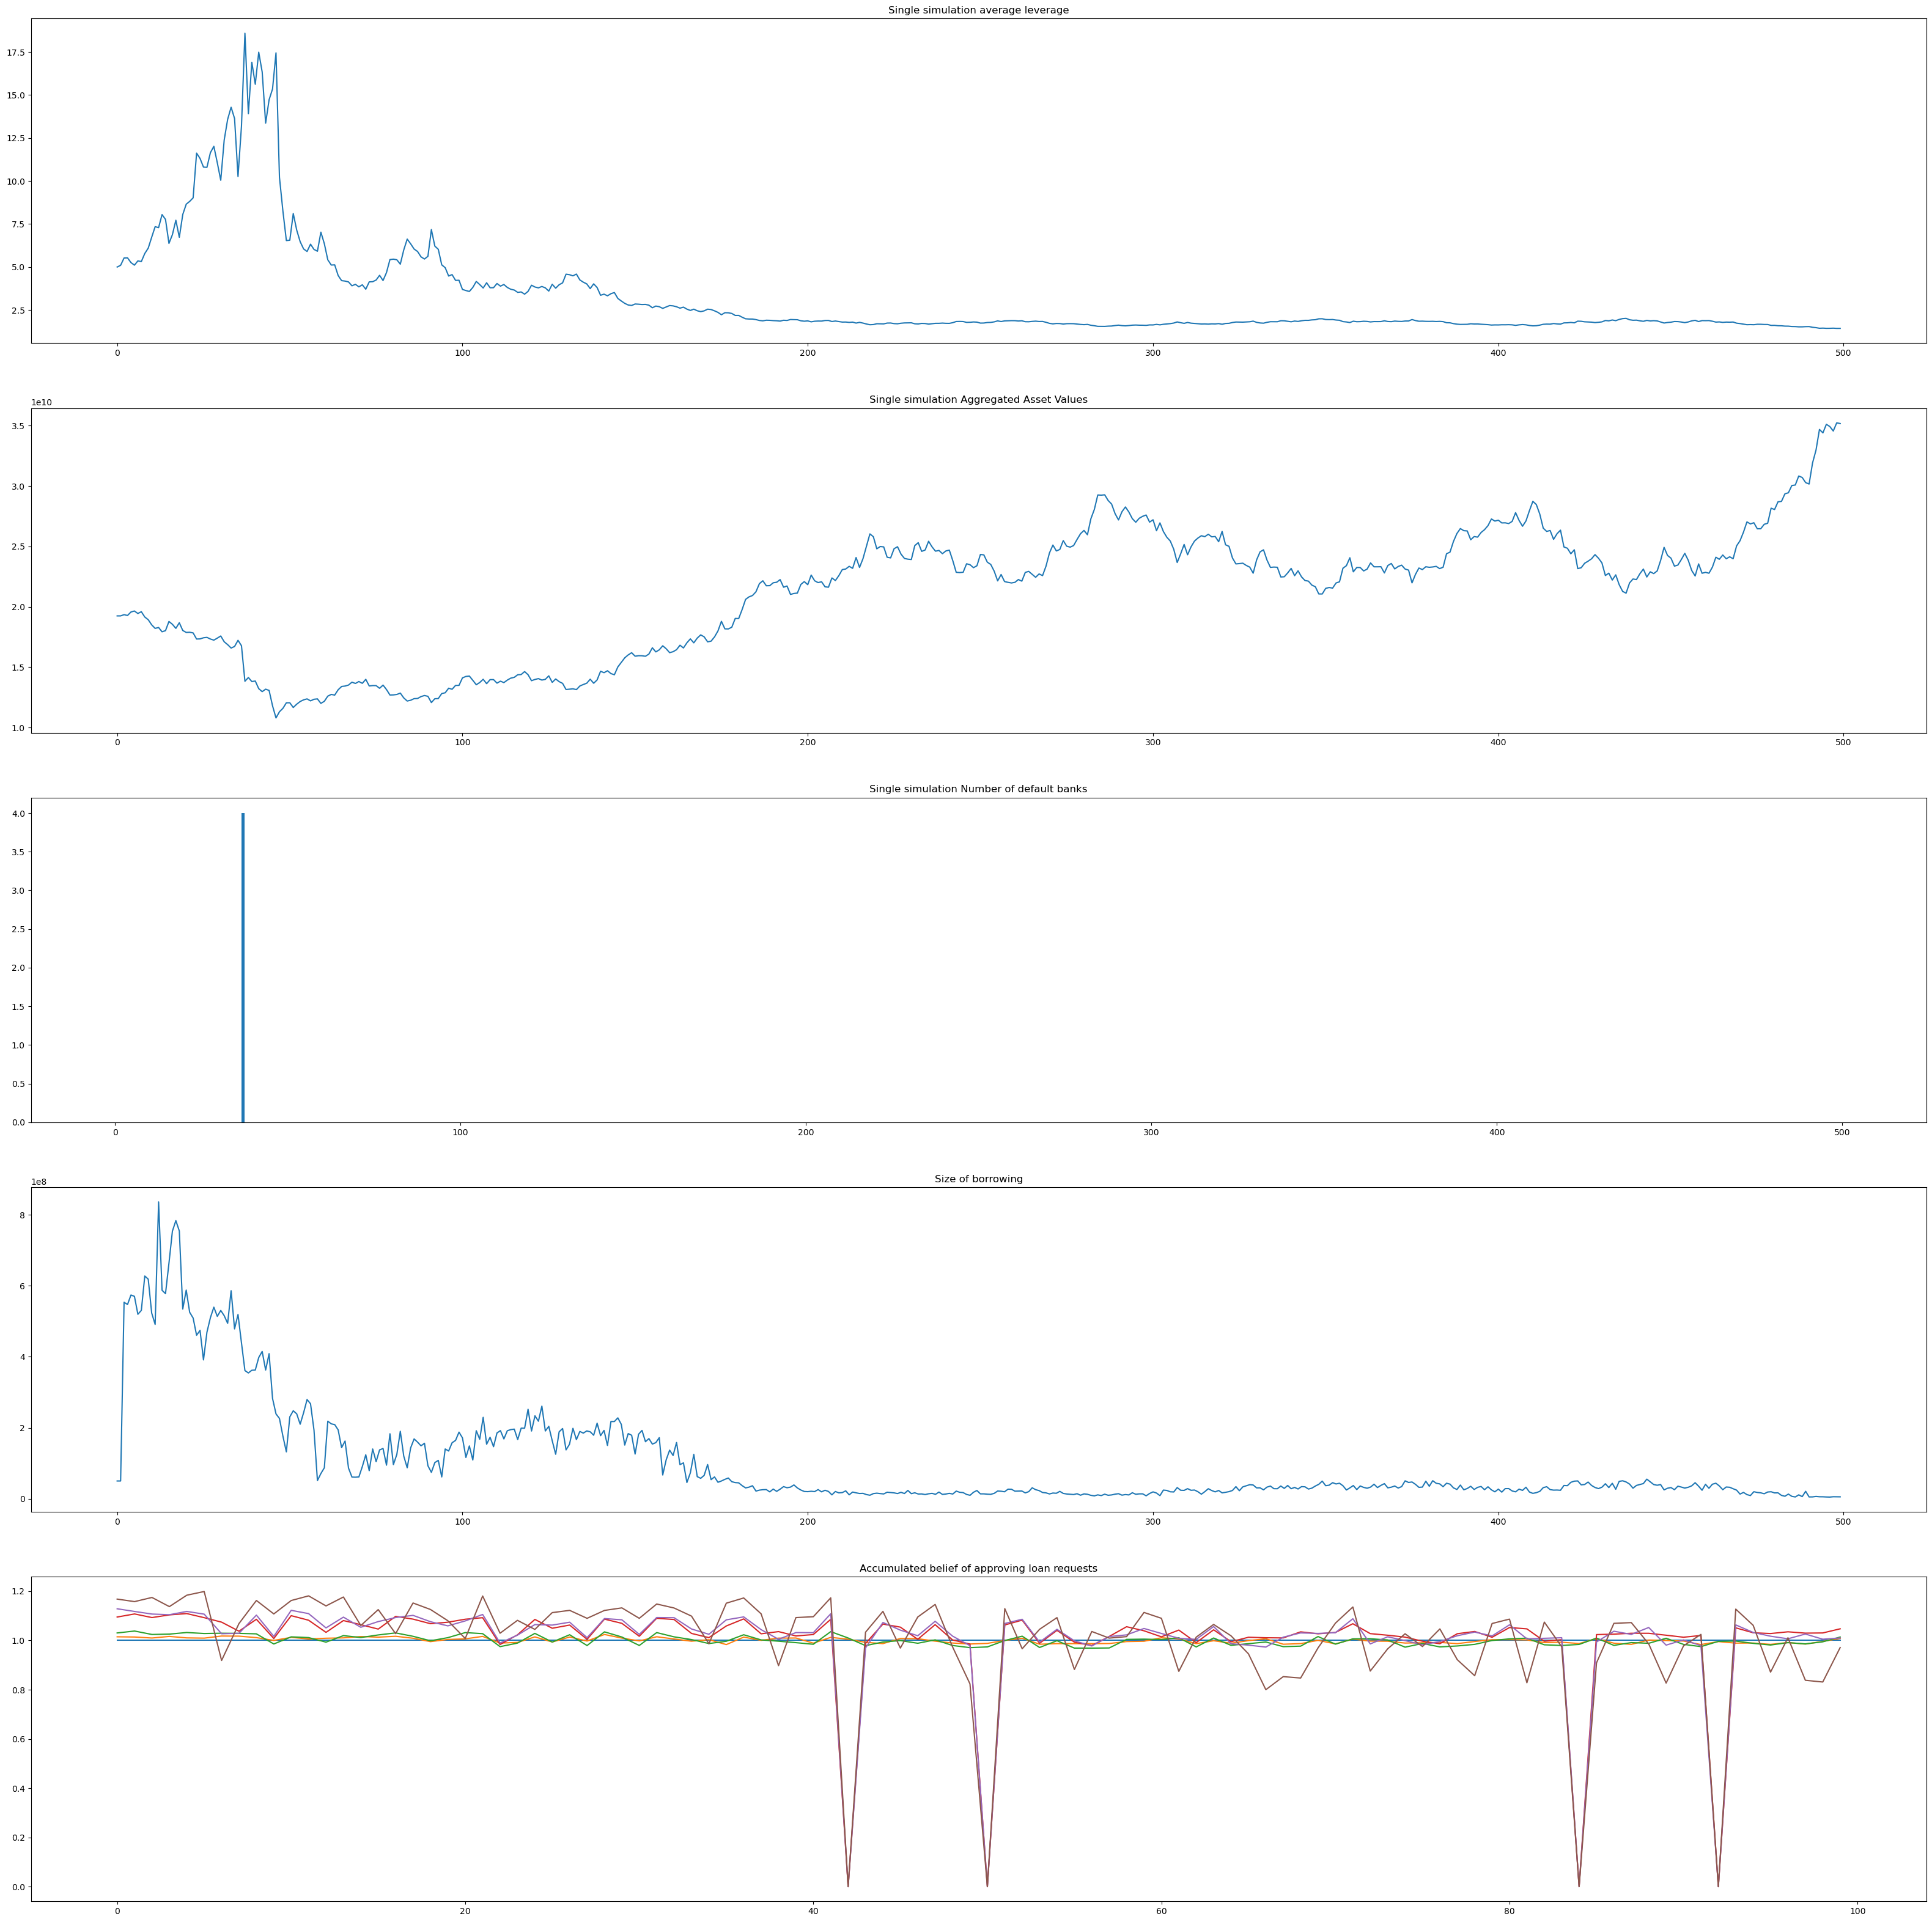

In [40]:
simulationMonitor(model, simulationSteps)